# <font color='red'>1 - </font> Getting Data

In [1]:
path = "../dataset/data/"

In [2]:
import pandas as pd
import glob

for file_path in glob.glob(path + "*.csv"):
    print(file_path)

df = pd.read_csv("../dataset/data/dataset-tickets-multi-lang3-4k.csv")

df.head()

df.fillna('')

../dataset/data/aa_dataset-tickets-multi-lang-5-2-50-version.csv
../dataset/data/dataset-tickets-german_normalized.csv
../dataset/data/dataset-tickets-german_normalized_50_5_2.csv
../dataset/data/dataset-tickets-multi-lang-4-20k.csv
../dataset/data/dataset-tickets-multi-lang3-4k.csv


,subject,body,answer,type,queue,priority,language,business_type,tag_1,tag_2,tag_3,tag_4,tag_5,tag_6,tag_7,tag_8,tag_9
0,Problema crítico del servidor requiere atenció...,Es necesaria una investigación inmediata sobre...,Estamos investigando urgentemente el problema ...,Incident,Technical Support,high,es,IT Services,Urgent Issue,Service Disruption,Incident Report,Service Recovery,System Maintenance,,,,
1,Anfrage zur Verfügbarkeit des Dell XPS 13 9310,"Sehr geehrter Kundenservice,\n\nich hoffe, die...","Sehr geehrter <name>,\n\nvielen Dank, dass Sie...",Request,Customer Service,low,de,Tech Online Store,Sales Inquiry,Product Support,Customer Service,Order Issue,Returns and Exchanges,,,,
2,Erro na Autocompletação de Código do IntelliJ ...,"Prezado Suporte ao Cliente <name>,\n\nEstou es...","Prezado <name>,\n\nObrigado por entrar em cont...",Incident,Technical Support,high,pt,IT Services,Technical Support,Software Bug,Problem Resolution,Urgent Issue,IT Support,,,,
3,Urgent Assistance Required: AWS Service,"Dear IT Services Support Team, \n\nI am reachi...","Dear <name>,\n\nThank you for reaching out reg...",Request,IT Support,high,en,IT Services,IT Support,Urgent Issue,Service Notification,Cloud Services,Problem Resolution,Technical Guidance,Performance Tuning,,
4,Problème d'affichage de MacBook Air,Cher équipe de support du magasin en ligne Tec...,"Cher <name>,\n\nMerci de nous avoir contactés ...",Incident,Product Support,low,fr,Tech Online Store,Technical Support,Product Support,Hardware Failure,Service Recovery,Routine Request,,,,
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3995,Problem mit der HP DeskJet 3755 WLAN-Verbindung,"Sehr geehrter Tech Online Store Support, mein ...","Sehr geehrter <name>, bitte stellen Sie sicher...",Problem,Customer Service,low,de,Tech Online Store,Technical Support,Product Support,Hardware Failure,Network Issue,Problem Resolution,,,,
3996,Problemas com a impressora HP DeskJet 3755,"Olá Suporte ao Cliente,\n\nEstou escrevendo pa...",Assunto: Re: Problemas com a impressora HP Des...,Incident,Product Support,medium,pt,Tech Online Store,Technical Support,Printer Issues,Hardware Failure,Network Issue,Problem Resolution,Customer Service,,,
3997,Problema urgente con el envío,"Estimado equipo de atención al cliente, me dir...","Estimado <name>,\n\nNos disculpamos por el ret...",Incident,Service Outages and Maintenance,high,es,Online Store,Shipping Delay,Customer Service,Order Issue,Urgent Issue,Problem Resolution,,,,
3998,,"Cher Service Client, nous rencontrons des prob...","Cher <name>,\n\nMerci de nous avoir contactés ...",Incident,Technical Support,high,fr,IT Services,Technical Support,IT Support,Network Issue,Urgent Issue,Problem Resolution,Service Recovery,,,


# <font color='red'>2 - </font> Data Analysis

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4000 entries, 0 to 3999
Data columns (total 17 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   subject        3533 non-null   object 
 1   body           3999 non-null   object 
 2   answer         4000 non-null   object 
 3   type           4000 non-null   object 
 4   queue          4000 non-null   object 
 5   priority       4000 non-null   object 
 6   language       4000 non-null   object 
 7   business_type  4000 non-null   object 
 8   tag_1          4000 non-null   object 
 9   tag_2          4000 non-null   object 
 10  tag_3          4000 non-null   object 
 11  tag_4          3999 non-null   object 
 12  tag_5          3363 non-null   object 
 13  tag_6          2181 non-null   object 
 14  tag_7          1045 non-null   object 
 15  tag_8          269 non-null    object 
 16  tag_9          0 non-null      float64
dtypes: float64(1), object(16)
memory usage: 531.4+ KB


Text(0, 0.5, 'Number of tickets')

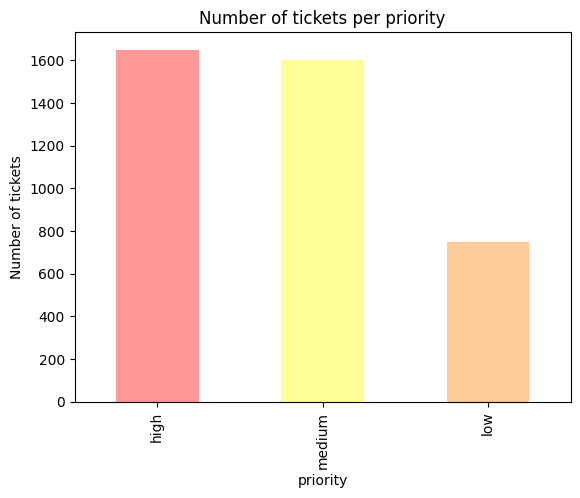

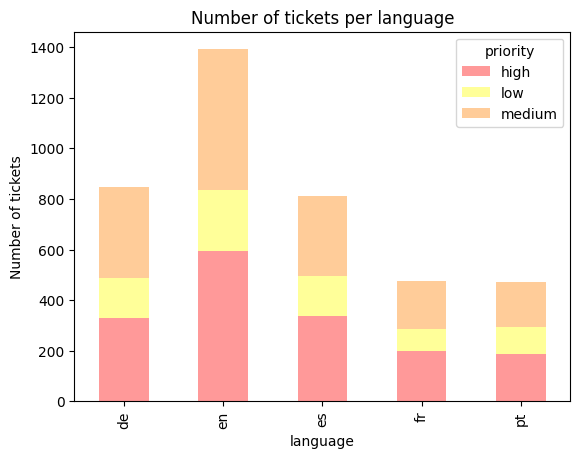

In [4]:
import matplotlib.pyplot as plt

counts = df['priority'].value_counts()[['high', 'medium', 'low']]
counts.plot(kind="bar", stacked=True, color=['#ff9999', '#ffff99', '#ffcc99', ] )
plt.title("Number of tickets per priority")
plt.ylabel("Number of tickets")

counts = df.groupby(['language', 'priority']).size().unstack(fill_value=0)
counts.plot(kind="bar", stacked=True, color=['#ff9999', '#ffff99', '#ffcc99', ] )
plt.title("Number of tickets per language")
plt.ylabel("Number of tickets")

Text(0.5, 0, 'Number of tickets')

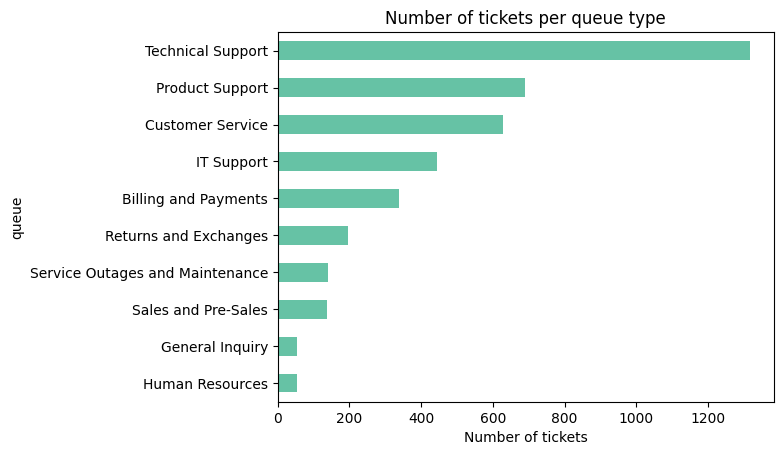

In [5]:
counts = df.groupby(['queue']).size().sort_values(ascending=True)
counts.plot(kind="barh", stacked=True, colormap="Set2")
plt.title("Number of tickets per queue type")
plt.xlabel("Number of tickets")

Text(0.5, 0, 'Number of tickets')

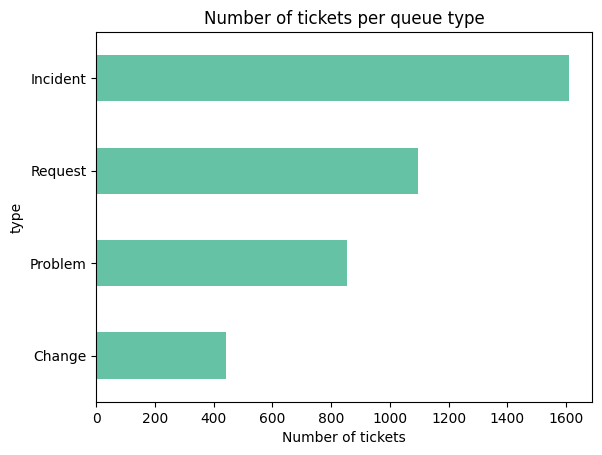

In [6]:
counts = df.groupby(['type']).size().sort_values(ascending=True)
counts.plot(kind="barh", stacked=True, colormap="Set2")
plt.title("Number of tickets per queue type")
plt.xlabel("Number of tickets")

Text(0.5, 0, 'Number of tickets')

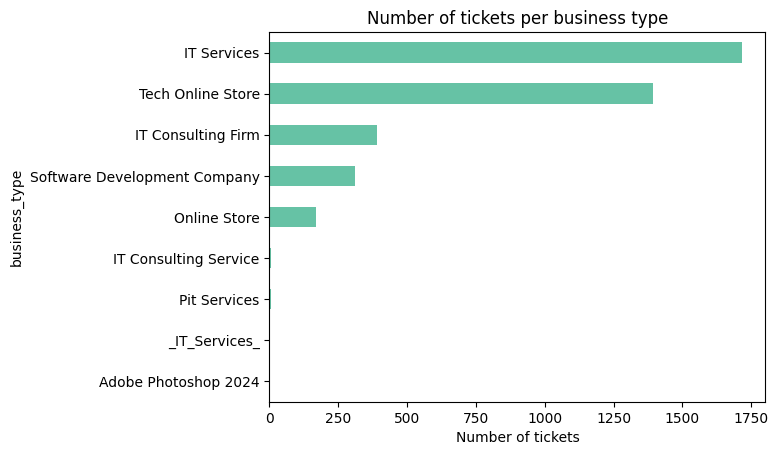

In [7]:
counts = df.groupby(['business_type']).size().sort_values(ascending=True)
counts.plot(kind="barh", stacked=True, colormap="Set2")
plt.title("Number of tickets per business type")
plt.xlabel("Number of tickets")

# <font color='red'>3 - </font> Training

In [8]:
X = (df["body"].values.astype(str) + df["queue"].values.astype(str)).reshape(-1)
y = df["priority"].values

In [ ]:
from sentence_transformers import SentenceTransformer

model = SentenceTransformer('sentence-transformers/paraphrase-multilingual-mpnet-base-v2')
embeddings = model.encode(X)

modules.json:   0%|          | 0.00/229 [00:00<?, ?B/s]

config_sentence_transformers.json:   0%|          | 0.00/122 [00:00<?, ?B/s]

README.md: 0.00B [00:00, ?B/s]

sentence_bert_config.json:   0%|          | 0.00/53.0 [00:00<?, ?B/s]

config.json:   0%|          | 0.00/645 [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/471M [00:00<?, ?B/s]

tokenizer_config.json:   0%|          | 0.00/480 [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/9.08M [00:00<?, ?B/s]

special_tokens_map.json:   0%|          | 0.00/239 [00:00<?, ?B/s]

config.json:   0%|          | 0.00/190 [00:00<?, ?B/s]

In [83]:
from sklearn.preprocessing import LabelEncoder

label_encoder = LabelEncoder()
y_encoded = label_encoder.fit_transform(y)

In [84]:
columns = [f"feature_{i+1}" for i in range(embeddings.shape[1])]
data = pd.DataFrame(embeddings, columns=columns)
data["y"] = y_encoded.tolist()

In [110]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(data[columns], data["y"], stratify=y_encoded, random_state=42)

In [214]:
import lightgbm as lgb
import optuna
from sklearn.metrics import f1_score
from sklearn.model_selection import StratifiedKFold, cross_val_score

def objective(trial):

    lr = trial.suggest_float(
        "lr", 1e-3, 5e-2, log=True)
    nb_esti = trial.suggest_int(
        "nb_esti", 100, 500, log=True)
    num_leaves = trial.suggest_int(
        "num_leaves", 10, 30, log=True)
    max_depth = trial.suggest_int(
        "max_depth", 3, 10, log=True)
    min_data_in_leaf = trial.suggest_int(
        "min_data_in_leaf", 100, 400, log=True)
    reg_alpha = trial.suggest_float(
        "reg_alpha", 5.0, 20.0)
    reg_lambda = trial.suggest_float(
        "reg_lambda", 5.0, 20.0)
    
    model = lgb.LGBMClassifier(
        n_estimators=nb_esti,
        num_leaves = num_leaves,
        learning_rate=lr,
        random_state=42,
        min_data_in_leaf=min_data_in_leaf,
        class_weight='balanced',
        verbose=-1,
        max_depth=max_depth,
        reg_alpha=reg_alpha,
        reg_lambda=reg_lambda
    )

    cv = StratifiedKFold(n_splits=3, shuffle=True, random_state=42)
    
    scores = cross_val_score(
        model, X_train, y_train, 
        cv=cv, 
        scoring='f1_weighted'
    )
    
    return scores.mean()

study = optuna.create_study(direction="maximize")
study.optimize(objective, n_trials=20)
study.best_params

[I 2025-07-07 22:19:43,864] A new study created in memory with name: no-name-6601275e-d3f8-4cb9-abce-916ebe923c4b
[I 2025-07-07 22:19:46,842] Trial 0 finished with value: 0.5121623095632107 and parameters: {'lr': 0.003178851221338485, 'nb_esti': 149, 'num_leaves': 20, 'max_depth': 8, 'min_data_in_leaf': 104, 'reg_alpha': 11.940779338116908, 'reg_lambda': 19.74045537173736}. Best is trial 0 with value: 0.5121623095632107.
[I 2025-07-07 22:19:56,594] Trial 1 finished with value: 0.552579714297715 and parameters: {'lr': 0.006956295354927403, 'nb_esti': 479, 'num_leaves': 25, 'max_depth': 7, 'min_data_in_leaf': 111, 'reg_alpha': 9.492423232986763, 'reg_lambda': 19.581170931652366}. Best is trial 1 with value: 0.552579714297715.
[I 2025-07-07 22:19:58,305] Trial 2 finished with value: 0.5019613606258478 and parameters: {'lr': 0.016240416526922388, 'nb_esti': 140, 'num_leaves': 12, 'max_depth': 6, 'min_data_in_leaf': 263, 'reg_alpha': 10.486505863529874, 'reg_lambda': 14.737709672105536}. Be

{'lr': 0.03700799284701117,
 'nb_esti': 351,
 'num_leaves': 15,
 'max_depth': 4,
 'min_data_in_leaf': 121,
 'reg_alpha': 8.949006866684005,
 'reg_lambda': 5.502967075510167}

In [215]:
best_params = study.best_params
best_params

{'lr': 0.03700799284701117,
 'nb_esti': 351,
 'num_leaves': 15,
 'max_depth': 4,
 'min_data_in_leaf': 121,
 'reg_alpha': 8.949006866684005,
 'reg_lambda': 5.502967075510167}

In [216]:
from sklearn.model_selection import cross_validate

best_model = lgb.LGBMClassifier(
    n_estimators=best_params["nb_esti"],
    learning_rate=best_params["lr"],
    num_leaves=best_params["num_leaves"],
    max_depth=best_params["max_depth"],
    random_state=42,
    class_weight='balanced',
    verbose=-1
)

cv = StratifiedKFold(n_splits=3, shuffle=True, random_state=42)
    
results = cross_validate(
    best_model, X_train, y_train, 
    cv=cv, 
    scoring='f1_weighted',
    return_estimator=True
)

best_fold_idx = results['test_score'].argmax()
best_model = results['estimator'][best_fold_idx]

In [217]:
y_pred = best_model.predict(X_test)

In [219]:
print("F1 score is: ", f1_score(y_test, y_pred, average="weighted"))

F1 score is:  0.634067450986156


# <font color='red'>4 - </font> Evaluation

In [220]:
from sklearn.metrics import f1_score, accuracy_score

print("F1 score is: ", f1_score(y_test, y_pred, average="weighted"))
print("Accuracy score is: ", accuracy_score(y_test, y_pred))

F1 score is:  0.634067450986156
Accuracy score is:  0.636


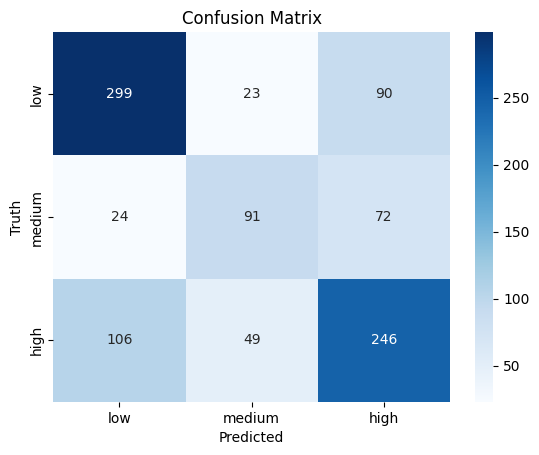

In [221]:
from sklearn.metrics import confusion_matrix
import seaborn as sns

cm = confusion_matrix(y_test, y_pred)
classes = ["low", "medium", "high"]

sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=classes, yticklabels=classes)
plt.xlabel('Predicted')
plt.ylabel('Truth')
plt.title('Confusion Matrix')
plt.show()